In [86]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# notebook dir
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
print('notebook_dir', notebook_dir)

# config auto reload
%load_ext autoreload
%autoreload 2

notebook_dir /home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/plotting


In [156]:
controller = 'gpmpc_acados'
prior = 'results/200_300_noise'
max_seed = 10
metric_name = 'metrics.txt'
s = 2 # times std
obs_dim = 6

In [78]:

data_folder_dir = f'../{controller}/{prior}/'
# find the folder in the dir
seed_data_folder = os.listdir(os.path.join(notebook_dir, data_folder_dir))
seed_data_folder = [f for f in seed_data_folder if os.path.isdir(os.path.join(data_folder_dir, f))]
seed_data_folder = sorted(seed_data_folder, key=lambda x: int(x.split('_')[1]))
# print('seed_data_folder', seed_data_folder)
seed_data_folder = [seed_data_folder[i]+'/temp' for i in range(max_seed)]
print('seed_data_folder', seed_data_folder)
seed_data_folder = [os.path.join(data_folder_dir, f) for f in seed_data_folder]
print('seed_data_folder', seed_data_folder)

seed_data_folder ['seed_1/temp', 'seed_2/temp', 'seed_3/temp', 'seed_4/temp', 'seed_5/temp', 'seed_6/temp', 'seed_7/temp', 'seed_8/temp', 'seed_9/temp', 'seed_10/temp']
seed_data_folder ['../gpmpc_acados/results/200_300_noise/seed_1/temp', '../gpmpc_acados/results/200_300_noise/seed_2/temp', '../gpmpc_acados/results/200_300_noise/seed_3/temp', '../gpmpc_acados/results/200_300_noise/seed_4/temp', '../gpmpc_acados/results/200_300_noise/seed_5/temp', '../gpmpc_acados/results/200_300_noise/seed_6/temp', '../gpmpc_acados/results/200_300_noise/seed_7/temp', '../gpmpc_acados/results/200_300_noise/seed_8/temp', '../gpmpc_acados/results/200_300_noise/seed_9/temp', '../gpmpc_acados/results/200_300_noise/seed_10/temp']


In [150]:

results = {}

for seed in range(0, max_seed):
    results[repr(seed)] = {}
    rmse_list = []
    early_stop_list = []
    noise_factor_list = []
    traj_data_list = []
    # fild runs
    load_seed_dir = seed_data_folder[seed]
    runs_data_folder = os.listdir(os.path.join(notebook_dir, load_seed_dir))
    runs_data_folder = [os.path.join(load_seed_dir, f) for f in runs_data_folder]
    # sort the runs
    runs_data_folder = sorted(runs_data_folder)
    print('runs_data_folder', runs_data_folder)
    for runs in runs_data_folder:
        # load the metric file in the folder
        metric_file = os.path.join(runs, metric_name)
        # print('metric_file', metric_file)
        data = pd.read_csv(metric_file, delimiter=':')
        # convert to numpy
        data = data.to_numpy()
        # print(data)
        # convert to dictionary
        data = {data[i][0]: data[i][1] for i in range(len(data))}

        noise_factor = eval(data['noise_factor'])
        rmse = eval(data['rmse'])
        early_stop = eval(data['early_stop'])
        rmse_list.append(rmse)
        early_stop_list.append(early_stop)
        noise_factor_list.append(noise_factor)

        # load the traj
        traj_file = os.path.join(runs, 'gpmpc_acados_data_quadrotor_traj_tracking.pkl')
        traj_data = pd.read_pickle(traj_file)
        traj_data = traj_data['trajs_data']['obs'][0]
    
    results[repr(seed)]['rmse'] = rmse_list
    results[repr(seed)]['early_stop'] = early_stop_list
    results[repr(seed)]['noise_factor'] = noise_factor_list
    results[repr(seed)]['traj_data'] = traj_data

max_noise_factor = max([max(results[repr(seed)]['noise_factor']) for seed in range(max_seed)])


runs_data_folder ['../gpmpc_acados/results/200_300_noise/seed_1/temp/seed1_Sep-08-16-32-52_f99d6cd', '../gpmpc_acados/results/200_300_noise/seed_1/temp/seed1_Sep-08-16-33-34_f99d6cd', '../gpmpc_acados/results/200_300_noise/seed_1/temp/seed1_Sep-08-16-34-17_f99d6cd', '../gpmpc_acados/results/200_300_noise/seed_1/temp/seed1_Sep-08-16-35-04_f99d6cd', '../gpmpc_acados/results/200_300_noise/seed_1/temp/seed1_Sep-08-16-35-46_f99d6cd', '../gpmpc_acados/results/200_300_noise/seed_1/temp/seed1_Sep-08-16-36-29_f99d6cd', '../gpmpc_acados/results/200_300_noise/seed_1/temp/seed1_Sep-08-16-37-12_f99d6cd', '../gpmpc_acados/results/200_300_noise/seed_1/temp/seed1_Sep-08-16-37-55_f99d6cd', '../gpmpc_acados/results/200_300_noise/seed_1/temp/seed1_Sep-08-16-38-38_f99d6cd', '../gpmpc_acados/results/200_300_noise/seed_1/temp/seed1_Sep-08-16-39-23_f99d6cd', '../gpmpc_acados/results/200_300_noise/seed_1/temp/seed1_Sep-08-16-40-07_f99d6cd', '../gpmpc_acados/results/200_300_noise/seed_1/temp/seed1_Sep-08-16-40

In [153]:
traj_data.shape

(126, 6)

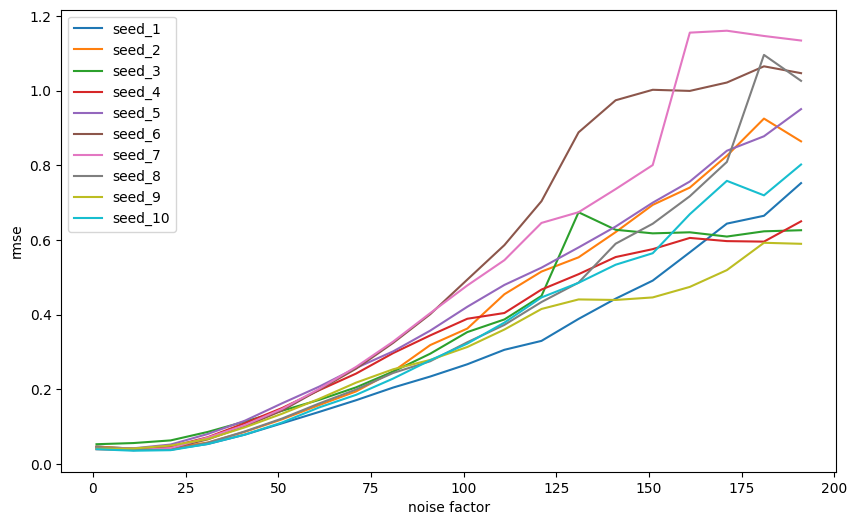

In [83]:
# plot the results
# x axis noise factor
# y axis rmse
fig, ax = plt.subplots(figsize=(10, 6))
for seed in range(max_seed):
    ax.plot(results[repr(seed)]['noise_factor'], results[repr(seed)]['rmse'], label=f'seed_{seed+1}')
ax.set_xlabel('noise factor')
ax.set_ylabel('rmse')
ax.legend()

In [127]:
# early stop
# results[repr(seed)]['early_stop']
# merge all the early stop
num_noise_factor = len(results[repr(seed)]['noise_factor'])
print('num_noise_factor', num_noise_factor)
early_stop_results = [False for _ in range(num_noise_factor)]
print('early_stop_results', early_stop_results)
print('len(early_stop_results)', len(early_stop_results))
for seed in range(max_seed):
    for i in range(len(results[repr(seed)]['noise_factor'])):
        early_stop_results[i] = early_stop_results[i] or results[repr(seed)]['early_stop'][i]
print('early_stop_results', early_stop_results)
# find the first early stop
first_early_stop = early_stop_results.index(True)
print('first_early_stop', first_early_stop)
early_stop_noise_factor = results[repr(seed)]['noise_factor'][first_early_stop]
print('early_stop_noise_factor', early_stop_noise_factor)

num_noise_factor 20
early_stop_results [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
len(early_stop_results) 20
early_stop_results [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True]
first_early_stop 13
early_stop_noise_factor 131


Text(0.5, 1.0, 'RMSE of GP-MPC with amplified noise')

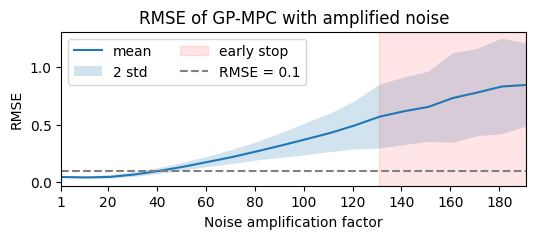

In [141]:
mean_rmse = np.mean([results[repr(seed)]['rmse'] for seed in range(max_seed)], axis=0)
std_rmse = np.std([results[repr(seed)]['rmse'] for seed in range(max_seed)], axis=0)

fig, ax = plt.subplots(figsize=(6, 2))
ax.plot(results[repr(seed)]['noise_factor'], mean_rmse, label='mean')
ax.fill_between(results[repr(seed)]['noise_factor'], mean_rmse- s*std_rmse, mean_rmse+ s*std_rmse, alpha=0.2, label=f'{s} std')

# plot shaded area for the first early stop
ax.axvspan(early_stop_noise_factor, max_noise_factor, color='red', alpha=0.1, label='early stop')

ax.set_xlim([1, max_noise_factor])
# explicitly show the tick from 1 to the max noise factor
noise_ticks = [i for i in range(20, max_noise_factor+1, 20)]
# append 1 at the beginning
noise_ticks = [1] + noise_ticks
ax.set_xticks(noise_ticks)
# plot y line at 0.1
ax.axhline(y=0.1, color='gray', linestyle='--', label='RMSE = 0.1')
ax.legend(ncol=2)
ax.set_xlabel('Noise amplification factor')
ax.set_ylabel('RMSE')
ax.set_title('RMSE of GP-MPC with amplified noise')

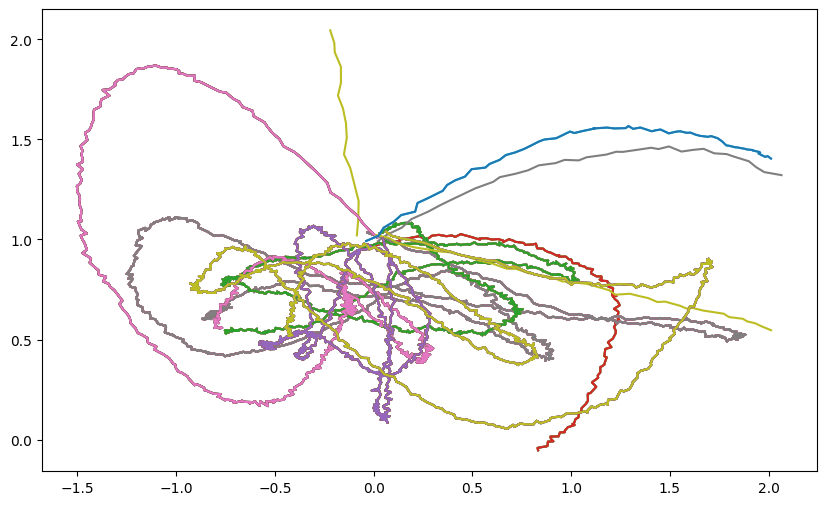

In [155]:

traj_results = {}
for seed in range(max_seed):
    # re-arrange the traj data to be in shape (noise_factor, max_steps, obs_dim)
    for i in range(1, max_noise_factor, 20):
        traj_data = np.zeros((len(traj_data_list), max_steps, obs_dim))
        for i in range(len(traj_data_list)):
            traj_data[i] = traj_data_list[i]
    traj_results[repr(seed)] = results[repr(seed)]['traj_data']


    for i in range(0, len(traj_data), 40):
        ax.plot(traj_data[:, 0], traj_data[:, 2], label=f'seed_{seed+1}')
fig, ax = plt.subplots(figsize=(10, 6))
# plot the traj every 40 noise factor